In [263]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [264]:
#load the data 
df = pd.read_csv('houses.csv')
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.190
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.800
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.000
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.400
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,2.50,1860.0,6325.0,2.0,0.0,0.0,4.0,7.0,1860.0,0.0,1991.0,0.0,98038.0,47.3492,-122.030,1860.0,29.100
996,2.0,2.75,1590.0,20917.0,1.5,0.0,0.0,3.0,5.0,1590.0,0.0,1920.0,0.0,98001.0,47.2786,-122.250,1310.0,19.995
997,2.0,1.00,850.0,2340.0,1.0,0.0,0.0,3.0,7.0,850.0,0.0,1922.0,0.0,98105.0,47.6707,-122.328,1300.0,55.350
998,2.0,1.00,1030.0,4188.0,1.0,0.0,0.0,3.0,8.0,1030.0,0.0,1981.0,0.0,98038.0,47.3738,-122.057,1450.0,18.995


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

In [266]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.349349,2.045796,2051.397397,14707.242242,1.446947,0.008008,0.237237,3.464464,7.605606,1750.233233,301.164164,1969.030030,81.830831,98074.441441,47.549720,-122.207406,1986.813814,52.071452
std,0.852367,0.721983,888.351113,28975.077254,0.517420,0.089173,0.765472,0.689521,1.160734,790.466905,451.023402,28.198607,395.767918,52.545832,0.141558,0.139564,670.723475,33.974907
min,0.000000,0.000000,380.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.490000,830.000000,8.000000
25%,3.000000,1.500000,1405.000000,5419.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.443000,-122.322500,1490.000000,30.980000
50%,3.000000,2.000000,1900.000000,8040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98058.000000,47.563600,-122.218000,1850.000000,43.500000
75%,4.000000,2.500000,2475.000000,11508.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2135.000000,580.000000,1992.000000,0.000000,98116.000000,47.673400,-122.118000,2360.000000,63.446250
max,7.000000,5.000000,6070.000000,315374.000000,3.500000,1.000000,4.000000,5.000000,12.000000,6070.000000,2060.000000,2015.000000,2014.000000,98199.000000,47.777600,-121.709000,4760.000000,308.000000


In [267]:
df.isnull().sum()

bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
price            1
dtype: int64

In [268]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'price'],
      dtype='object')

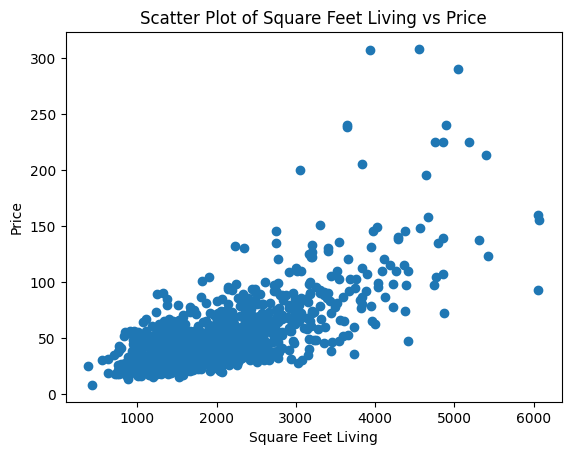

In [269]:
#draw the scatter plot for the data
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Square Feet Living')
plt.ylabel('Price')
plt.title('Scatter Plot of Square Feet Living vs Price')
plt.show()

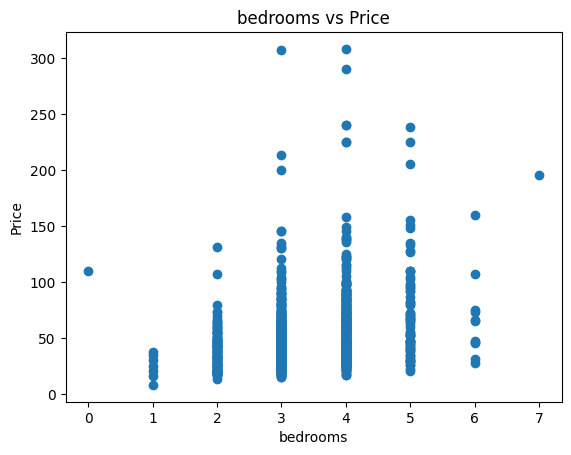

In [270]:
#draw the scatter plot for the data
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.title('bedrooms vs Price')
plt.show()

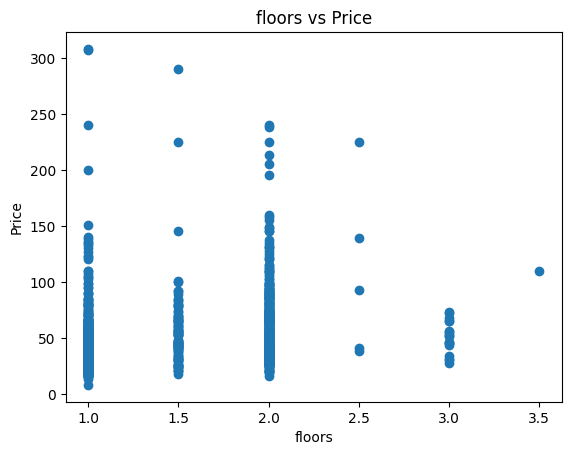

In [271]:
#draw the scatter plot for floors
plt.scatter(df['floors'], df['price'])
plt.xlabel('floors')
plt.ylabel('Price')
plt.title('floors vs Price')
plt.show()

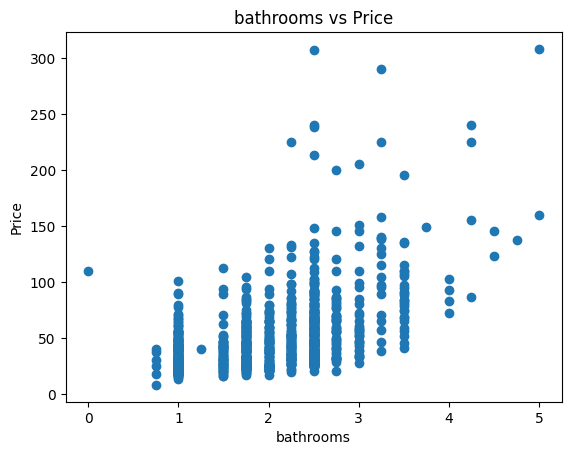

In [272]:
##draw the scatter plot for floors
plt.scatter(df['bathrooms'], df['price'])
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.title('bathrooms vs Price')
plt.show()

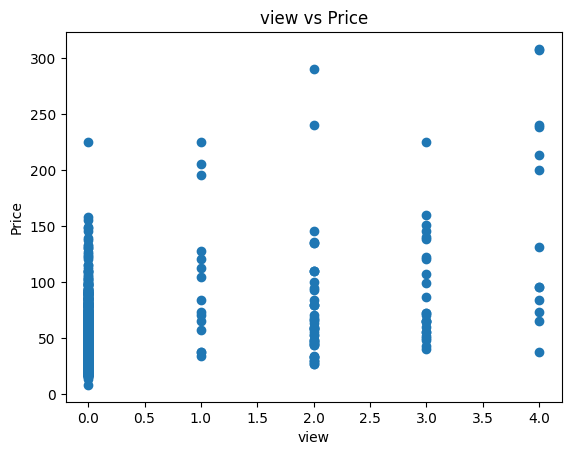

In [273]:
##draw the scatter plot for floors
plt.scatter(df['view'], df['price'])
plt.xlabel('view')
plt.ylabel('Price')
plt.title('view vs Price')
plt.show()

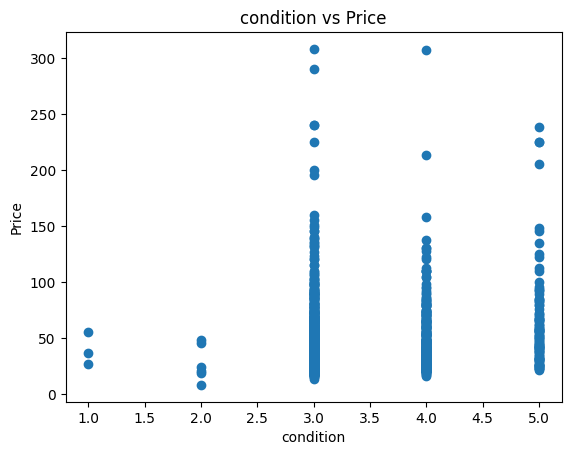

In [274]:
##draw the scatter plot for floors
plt.scatter(df['condition'], df['price'])
plt.xlabel('condition')
plt.ylabel('Price')
plt.title('condition vs Price')
plt.show()

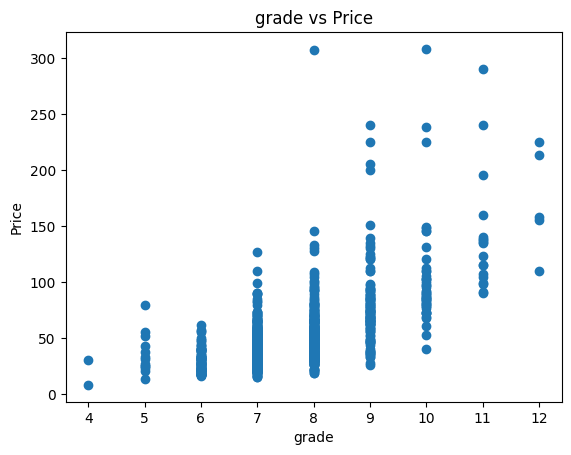

In [275]:
##draw the scatter plot for floors
plt.scatter(df['grade'], df['price'])
plt.xlabel('grade')
plt.ylabel('Price')
plt.title('grade vs Price')
plt.show()

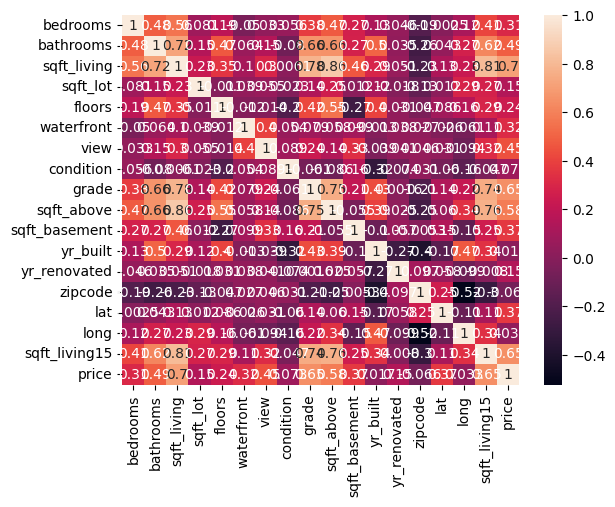

In [276]:
#draw the heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

In [277]:
#drop the columns
df.drop(['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15'], axis=1, inplace=True)

In [278]:
#handle the missing values with the mean
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
sqft_above     0
price          0
dtype: int64

In [279]:
#define the x and y
X = df.drop('price', axis=1)
y = df['price']

In [280]:
#scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [281]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
#train the model
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [283]:
from sklearn.linear_model import SGDRegressor

#train the model
sgd = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001,
#                                  l1_ratio=0.15, fit_intercept=True, max_iter=None,
#                                  tol=None, shuffle=True, verbose=0, epsilon=0.1,
#                                  random_state=None, learning_rate='invscaling’,
#                                  eta0=0.01, power_t=0.25, early_stopping=False,
#                                  validation_fraction=0.1, n_iter_no_change=5,
#                                  warm_start=False, average=False, n_iter=None
)
sgd.fit(X_train, y_train)

SGDRegressor()

In [284]:
#ridge regression
ridge = Ridge(alpha=.0001, max_iter=1000, tol=0.001, solver='auto', random_state=92, fit_intercept=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001, max_iter=1000, random_state=92, tol=0.001)

In [285]:
#lasso regression
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [286]:
#elastic net
elastic = ElasticNet()
elastic.fit(X_train, y_train)

ElasticNet()

In [287]:
#test the model
y_pred = model.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_elastic = elastic.predict(X_test)

In [288]:
#evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Ridge Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))
print('Lasso Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
print('Elastic Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic))

Mean Squared Error: 409.60796509982674
Ridge Mean Squared Error: 409.6079471854982
Lasso Mean Squared Error: 422.5029590317488
Elastic Mean Squared Error: 460.4788791508457


In [289]:
#print the coefficients
print('Coefficients:', model.coef_)
print('Ridge Coefficients:', ridge.coef_)
print('Lasso Coefficients:', lasso.coef_)
print('Elastic Coefficients:', elastic.coef_)

Coefficients: [-1.64782289 -2.46504951 20.83068065 -0.61590246  0.19108968  4.68667933
  4.87308053  1.45044223  9.39990344 -3.77986934]
Ridge Coefficients: [-1.64782078 -2.46504382 20.83066097 -0.61590272  0.19108559  4.68667846
  4.87308302  1.45044269  9.39990269 -3.77985393]
Lasso Coefficients: [-0.         -0.         15.05601647 -0.         -0.          3.98076869
  5.30788282  0.76468175  7.73857362 -0.        ]
Elastic Coefficients: [ 0.35041915  1.65489304  8.13969694  0.         -0.          3.39321625
  5.02750317  1.13534088  6.66423244  3.45741857]


In [290]:
#print the intercept
print('Intercept:', model.intercept_)
print('Ridge Intercept:', ridge.intercept_)
print('Lasso Intercept:', lasso.intercept_)
print('Elastic Intercept:', elastic.intercept_)

Intercept: 52.18377690236552
Ridge Intercept: 52.18377700223641
Lasso Intercept: 52.25838451957147
Elastic Intercept: 52.33553544837866


In [291]:
#print the score
print('Score:', model.score(X_test, y_test))
print('Ridge Score:', ridge.score(X_test, y_test))
print('Lasso Score:', lasso.score(X_test, y_test))
print('Elastic Score:', elastic.score(X_test, y_test))

Score: 0.6371597034369714
Ridge Score: 0.6371597193059018
Lasso Score: 0.6257370168168596
Elastic Score: 0.5920970603406497


In [292]:
#print the predictions
print('Predictions:', y_pred)
print('Ridge Predictions:', y_pred_ridge)
print('Lasso Predictions:', y_pred_lasso)
print('Elastic Predictions:', y_pred_elastic)

Predictions: [ 14.46135877  55.51505009  51.3208163   27.25279554   7.21300216
  73.0513946   51.80085868  31.91565251  29.83419376  46.90238283
  38.77714598  41.43336333  25.23334951  44.21631432  44.86544686
  31.8702448   59.6757907   52.29438267  36.07372615  13.70852791
  29.39910451  61.58408545  52.66760152 149.5646156   40.05842759
  89.21476702  47.36930822  43.41867482  97.98019552  60.12820407
  17.4805601   35.39744402  45.7259221   43.74911249  31.6525694
  38.51208077  53.14514533  34.59689987  73.38198718  43.04982795
  25.40574072  42.71510399 123.73148643  77.66346199  51.0198796
  93.11686728  51.09869793  64.39773796  69.43462402  41.60689939
  36.37146711  22.19800971  32.08114424  53.63628442  29.0030037
  55.60364435  47.34960536  86.41756195  39.97754921  21.68667251
  30.04493798  62.89296394  58.03640705  42.97211402  32.07804931
  57.24662776  34.76733211  68.74331754 128.16077586  51.57383009
  41.68927173  56.96699153  40.76481907  22.72997338  58.66708868


In [293]:
#print the acuracy % for each model
print('Accuracy:', model.score(X_test, y_test) * 100)
print('Ridge Accuracy:', ridge.score(X_test, y_test) * 100)
print('Lasso Accuracy:', lasso.score(X_test, y_test) * 100)
print('Elastic Accuracy:', elastic.score(X_test, y_test) * 100)
print('SGD Accuracy:', sgd.score(X_test, y_test) * 100)

Accuracy: 63.71597034369714
Ridge Accuracy: 63.71597193059018
Lasso Accuracy: 62.573701681685954
Elastic Accuracy: 59.209706034064965
SGD Accuracy: 62.33688642339703
